In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import os
if os.name == 'posix':
    plt.rc('font', family = "AppleGothic")
else:
    plt.rc('font', family = "malgun Gothic")
plt.rc("axes", unicode_minus = False)

In [3]:
%config InlineBackend.figure_format = 'retina'

### 1-1

In [4]:
# 질문지

question = pd.read_csv('data/schema.csv')
question.shape

(290, 3)

In [5]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [6]:
# 선다혀 객관식 문제에 대한 응답

mcq = pd.read_csv('data/multipleChoiceResponses.csv',
                 encoding = 'ISO-8859-1', low_memory=False)
mcq.shape

(16716, 228)

In [7]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [8]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


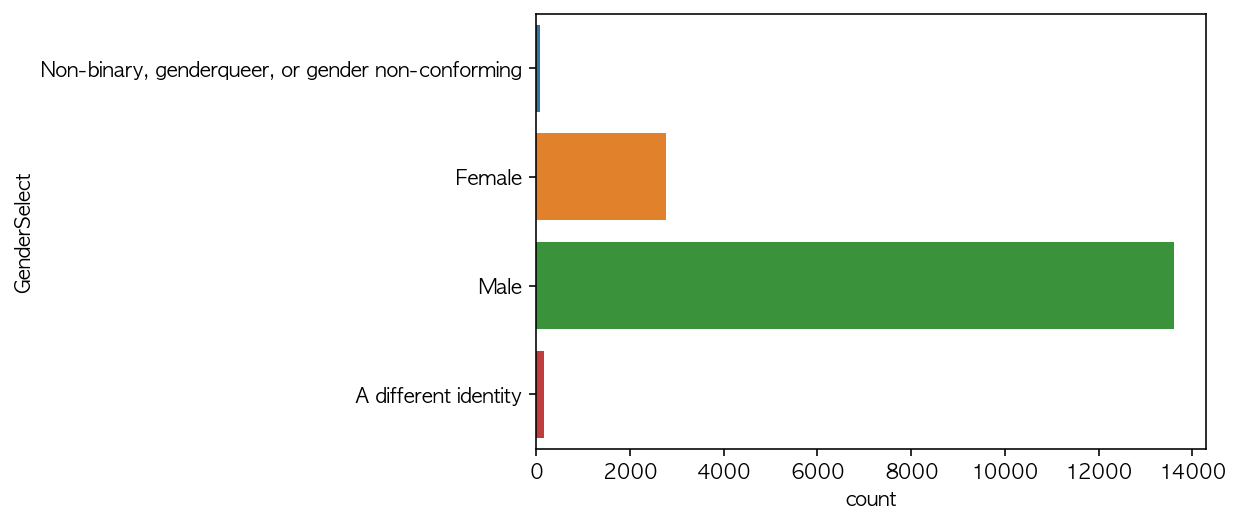

In [9]:
# 설문통계 시각화

sns.countplot(data = mcq, y = 'GenderSelect')

In [10]:
con_df = pd.DataFrame(mcq['Country'].value_counts())

con_df['국가'] = con_df.index
con_df.columns = ['응답 수', '국가']


#index 컬럼을 삭제하고 순위를 위해 reset_index() 사용

con_df = con_df.reset_index().drop('index', axis = 1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [11]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

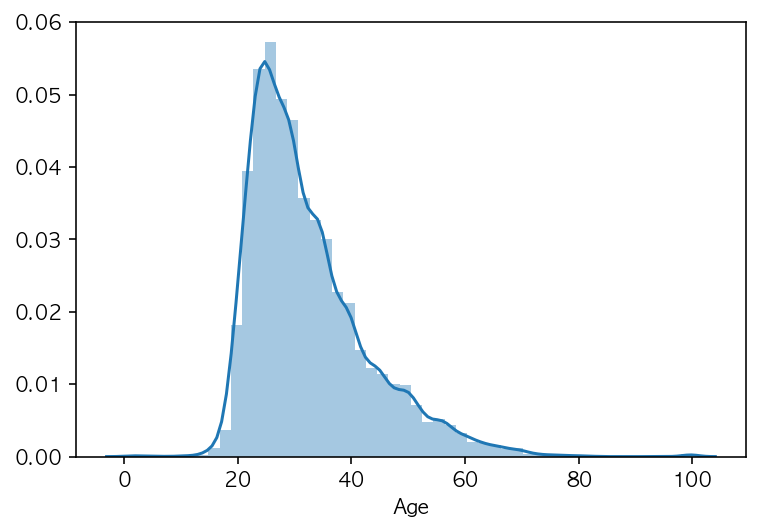

In [12]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'], )

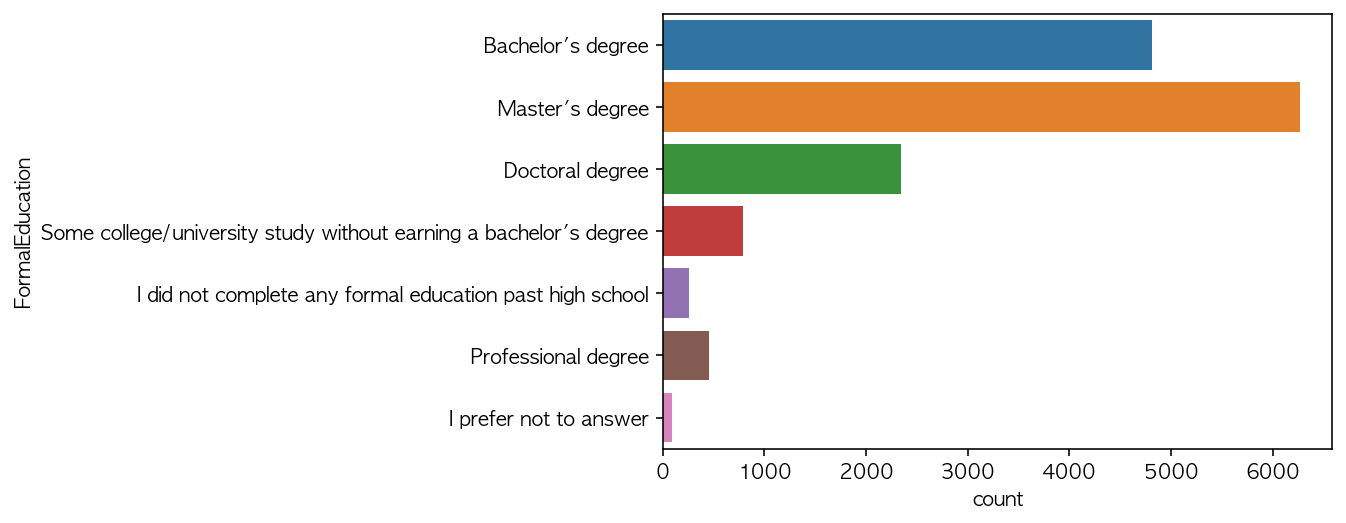

In [13]:
# 학력

sns.countplot(y = 'FormalEducation', data = mcq)

In [14]:
# 전공 여부
mcq_major_count = pd.DataFrame(
        mcq['MajorSelect'].value_counts())

# 각 응답 비율
mcq_major_percent = pd.DataFrame(
        mcq['MajorSelect'].value_counts(normalize = True))

# 두 df merge
mcq_major_df = mcq_major_count.merge(
        mcq_major_percent, left_index = True, right_index = True)

mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


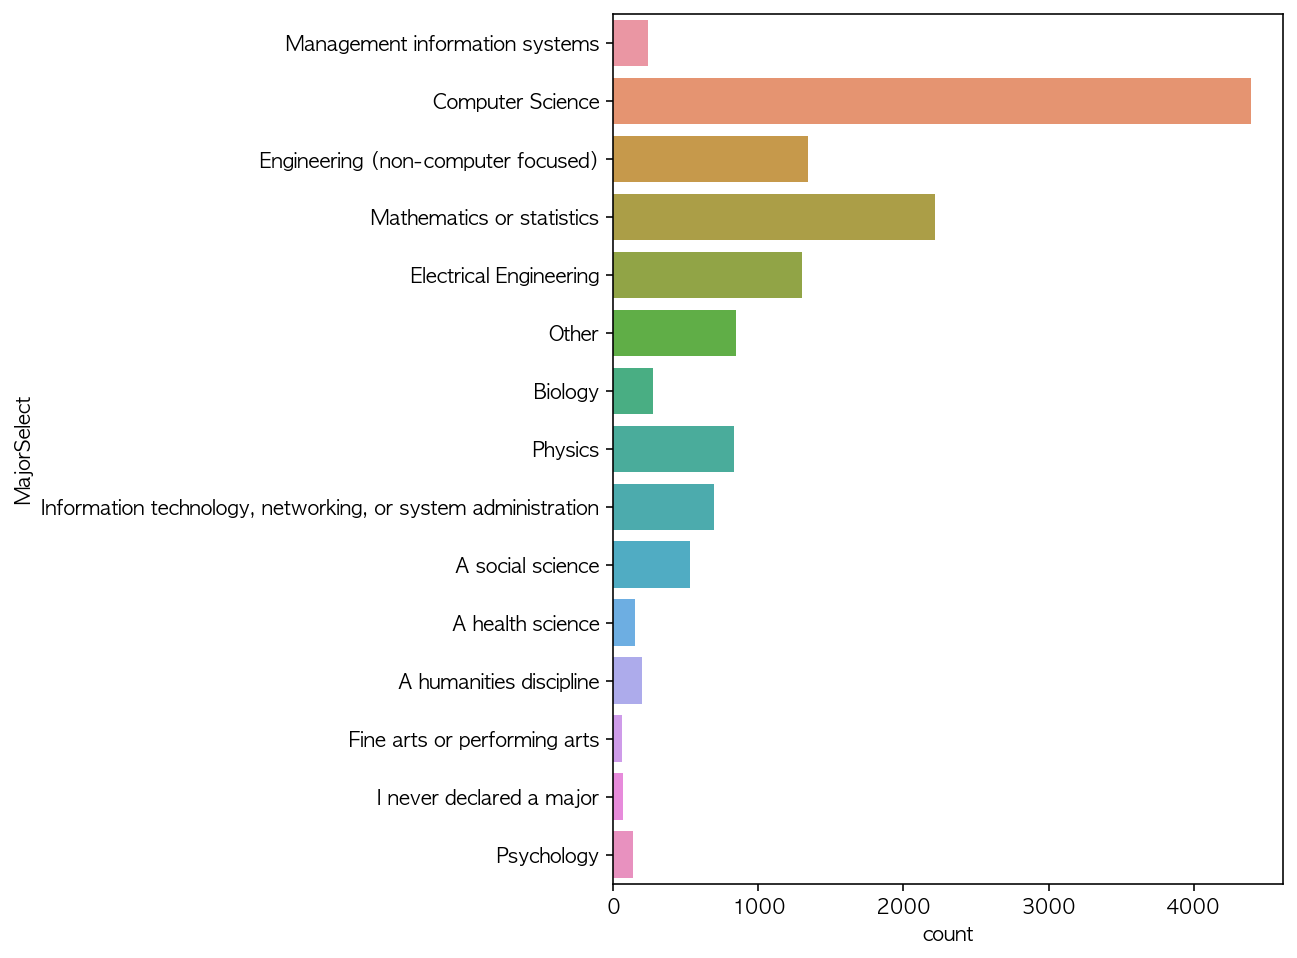

In [15]:
plt.figure(figsize = (6, 8))
sns.countplot(y = 'MajorSelect', data = mcq)

In [16]:
# 취업여부
mcq_es_count = pd.DataFrame(
        mcq['EmploymentStatus'].value_counts())

# 각 응답 비율
mcq_es_percent = pd.DataFrame(
        mcq['EmploymentStatus'].value_counts(normalize = True))

# 두 df merge
mcq_es_df = mcq_es_count.merge(
        mcq_es_percent, left_index = True, right_index = True)

mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


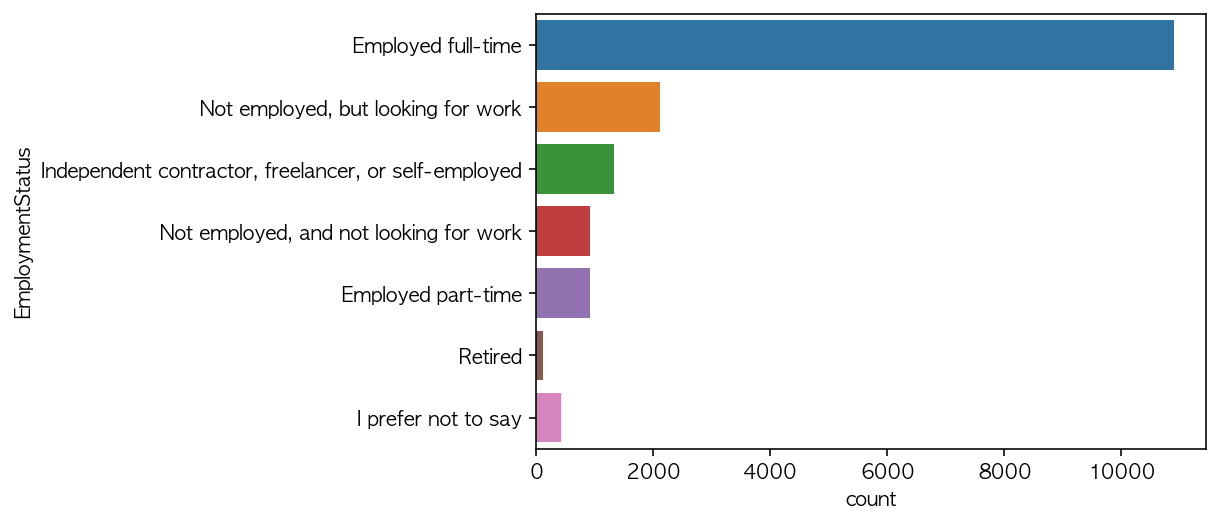

In [17]:
sns.countplot(y = 'EmploymentStatus', data = mcq)

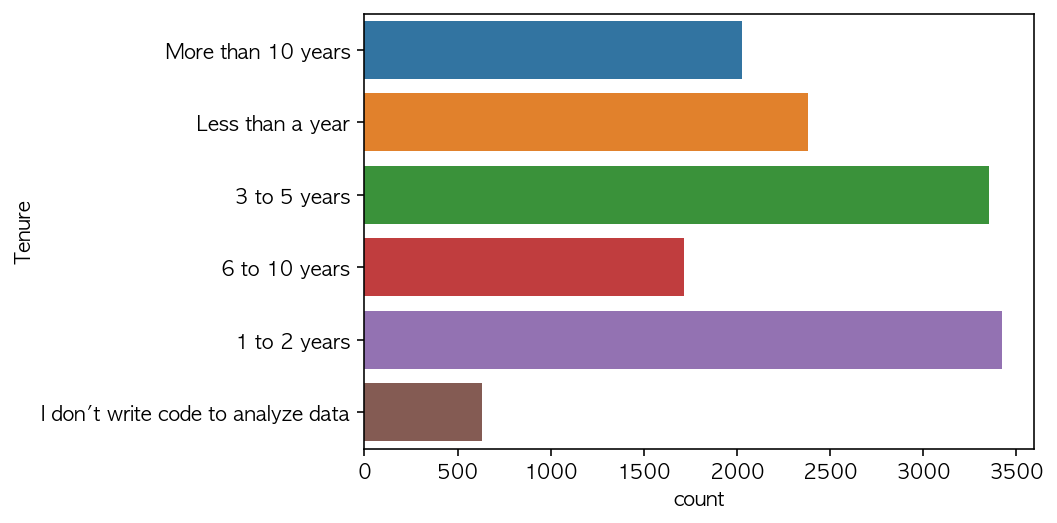

In [18]:
# 프로그래밍 경험
sns.countplot(y = 'Tenure', data = mcq)

The number of interviewees in Korea: 194


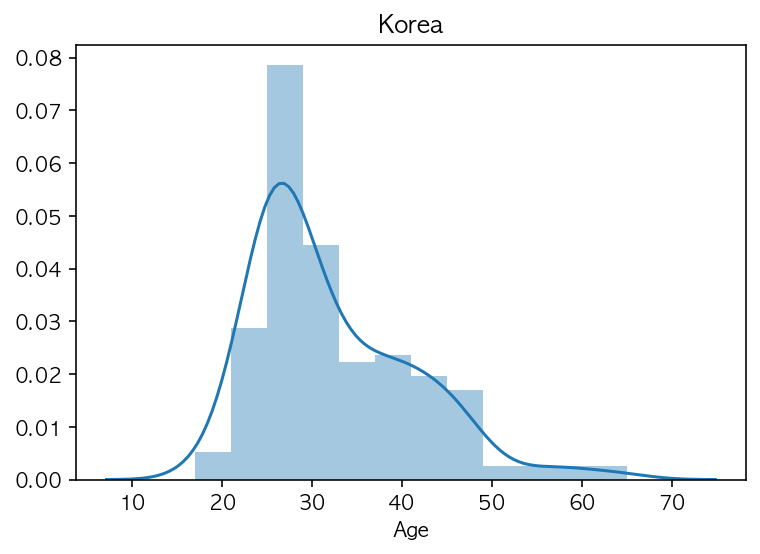

In [19]:
korea = mcq.loc[(mcq['Country'] == 'South Korea')]
print('The number of interviewees in Korea: ' + str(korea.shape[0]))

# dropna() -> 결측치 있는 행 포함 X

sns.distplot(korea['Age'].dropna())
plt.title('Korea')
plt.show()

In [20]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


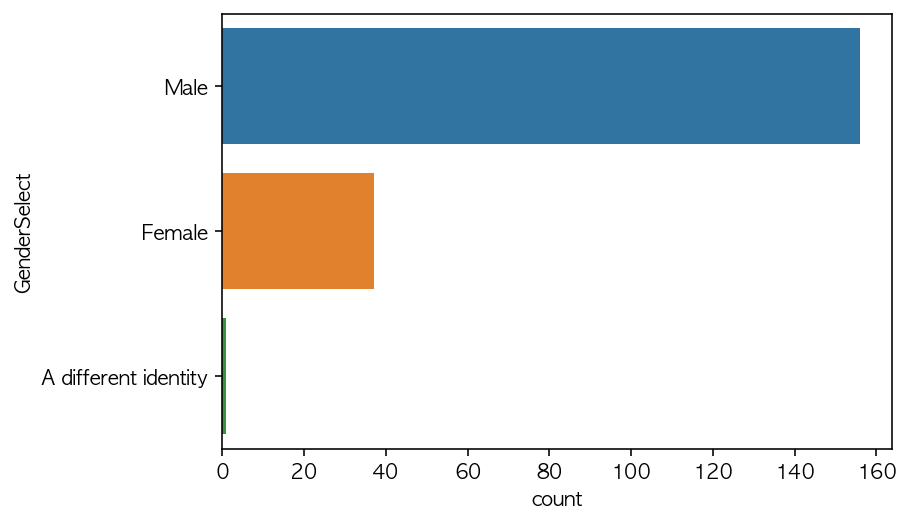

In [21]:
sns.countplot(y = 'GenderSelect', data = korea)

Text(0.5, 1.0, 'korean Male')

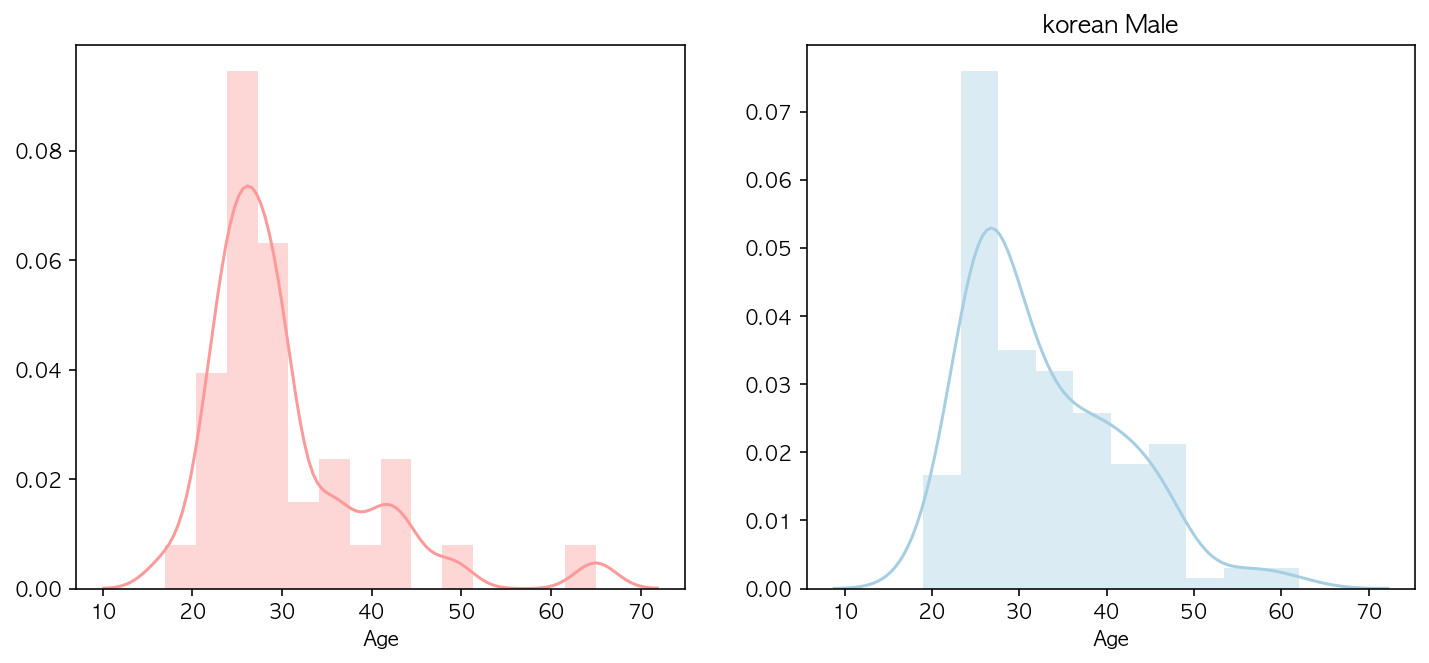

In [22]:
# 성별을 연령대별로

figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

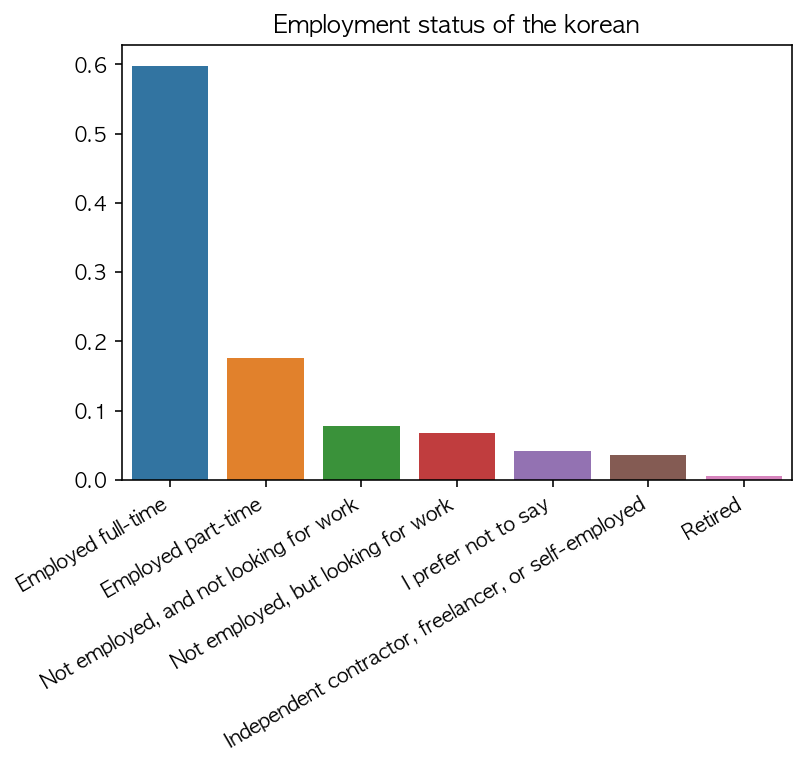

In [23]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea), data = korea)
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

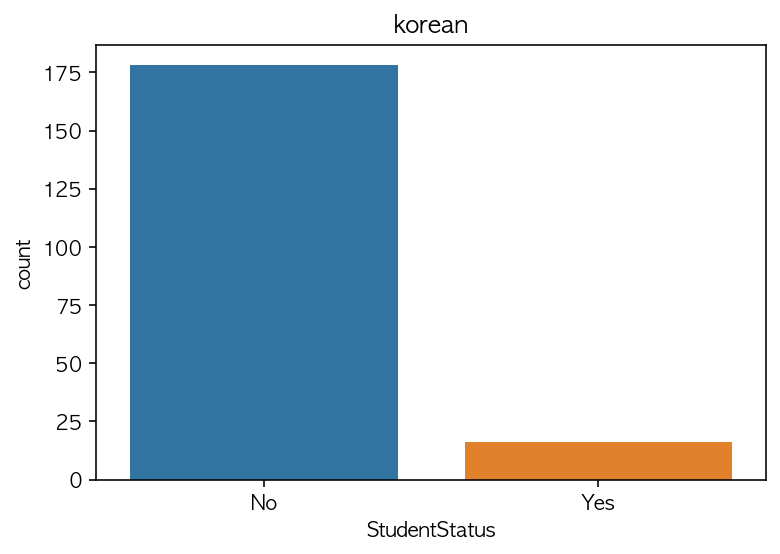

In [24]:
# 학생여부

korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [25]:
full_time = mcq.loc[mcq['EmploymentStatus'] == 'Employed full-time']
print(full_time.shape)
looking_for_job = mcq.loc[
    mcq['EmploymentStatus'] == 'Not employed, but looking for work']
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


### 1-2

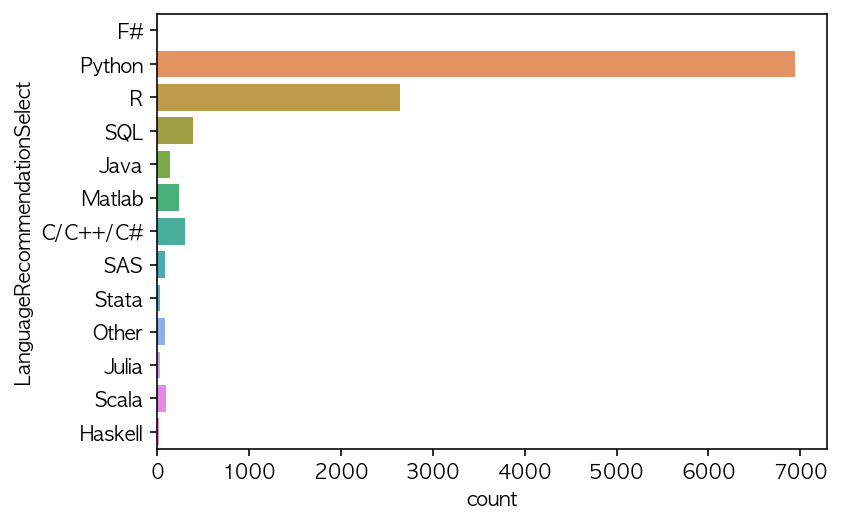

In [27]:
# FAQ 시각화
# 1 Python vs R

sns.countplot(y = 'LanguageRecommendationSelect', data = mcq)

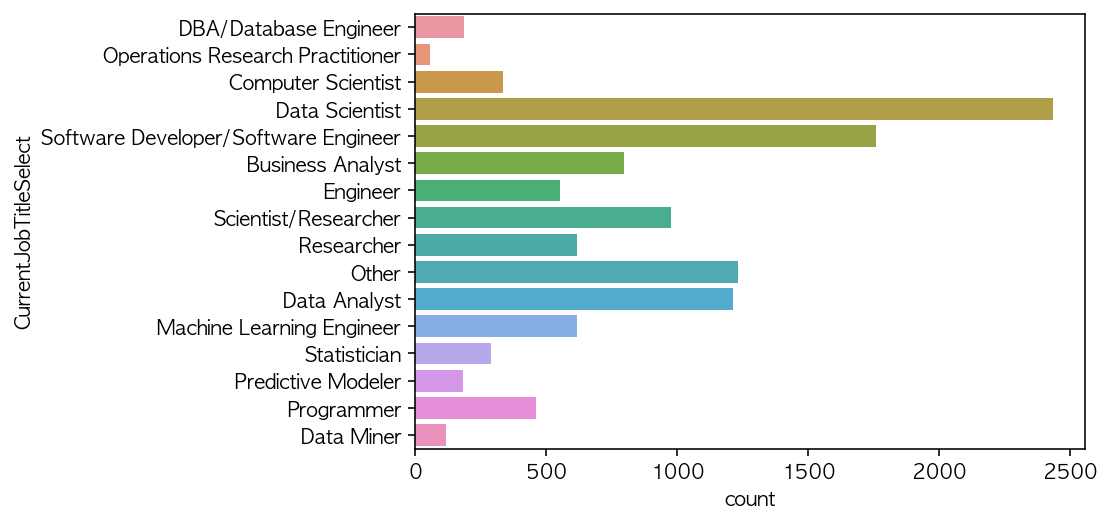

In [29]:
# 현재 하고있는 일
sns.countplot(y = mcq['CurrentJobTitleSelect'])

In [30]:
# 응답 수

mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


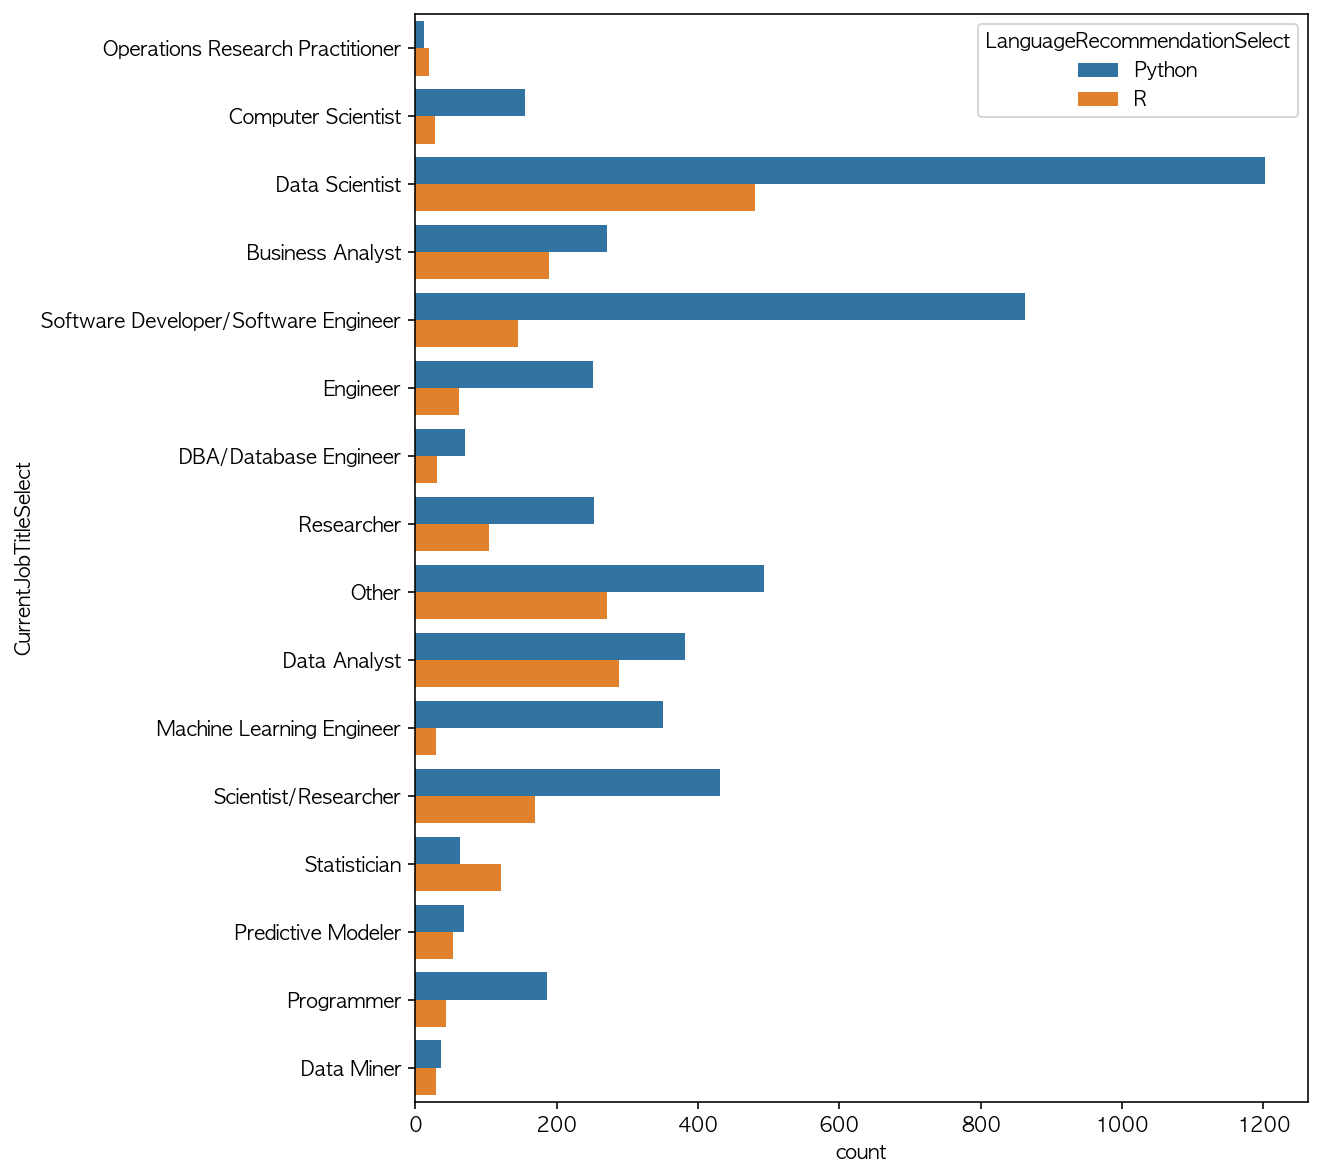

In [31]:
# 응답자 중에 python / r 사용하는 사람

data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect'] == 'Python') | (
        mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect', 
              hue='LanguageRecommendationSelect', 
              data=data)

In [32]:
# 2 데이터 사이언스 분야에서 앞으로 주목받을 것은?

# 데이터사이언스 툴

mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))

mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index=True, right_index=True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


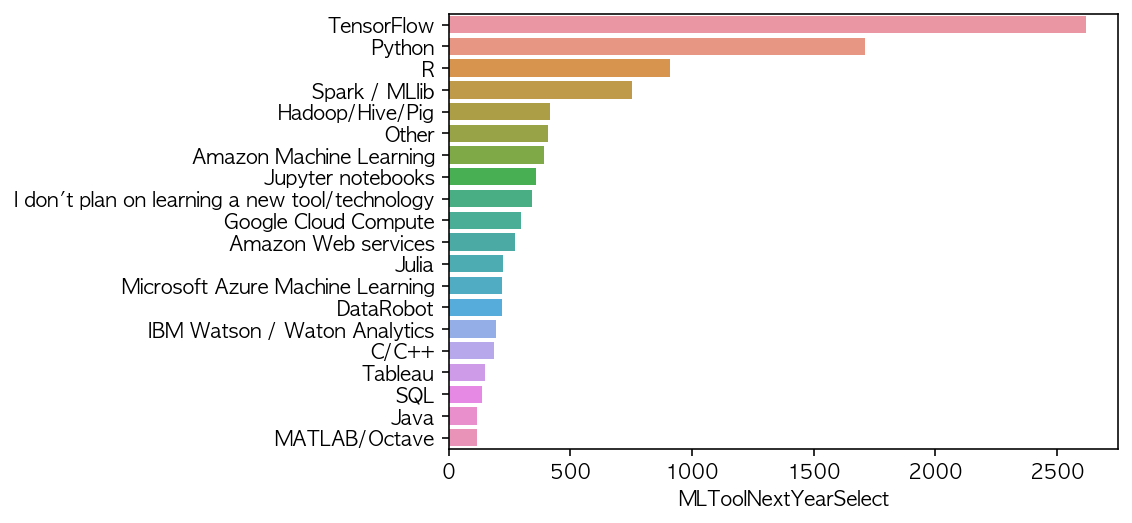

In [37]:
# 시각화

data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y = data.index, x = data)

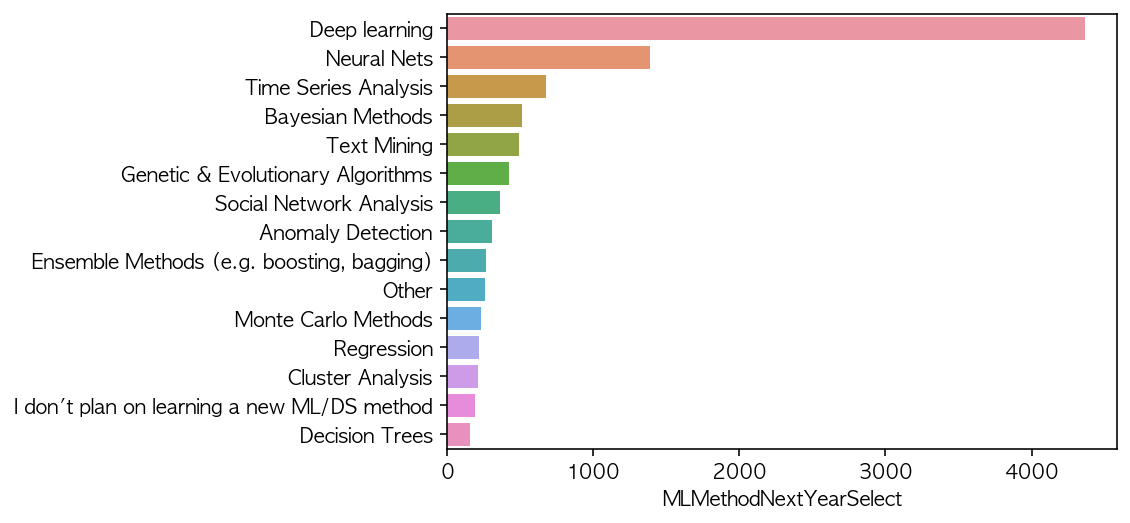

In [38]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [39]:
# 3 어디에서 데이터 사이언스를 배워야 할까
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

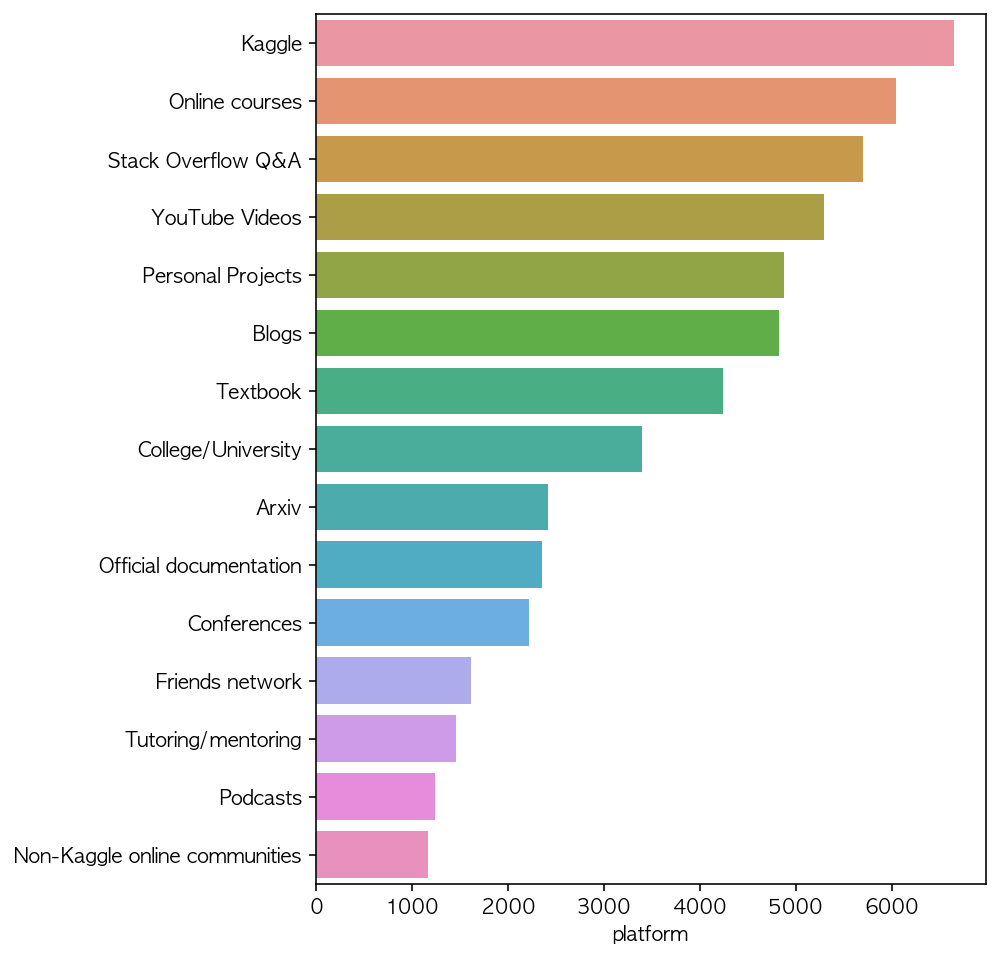

In [40]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [41]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [42]:
use_features = [x for x in mcq.columns if x.find(
    'LearningPlatformUsefulness') != -1]

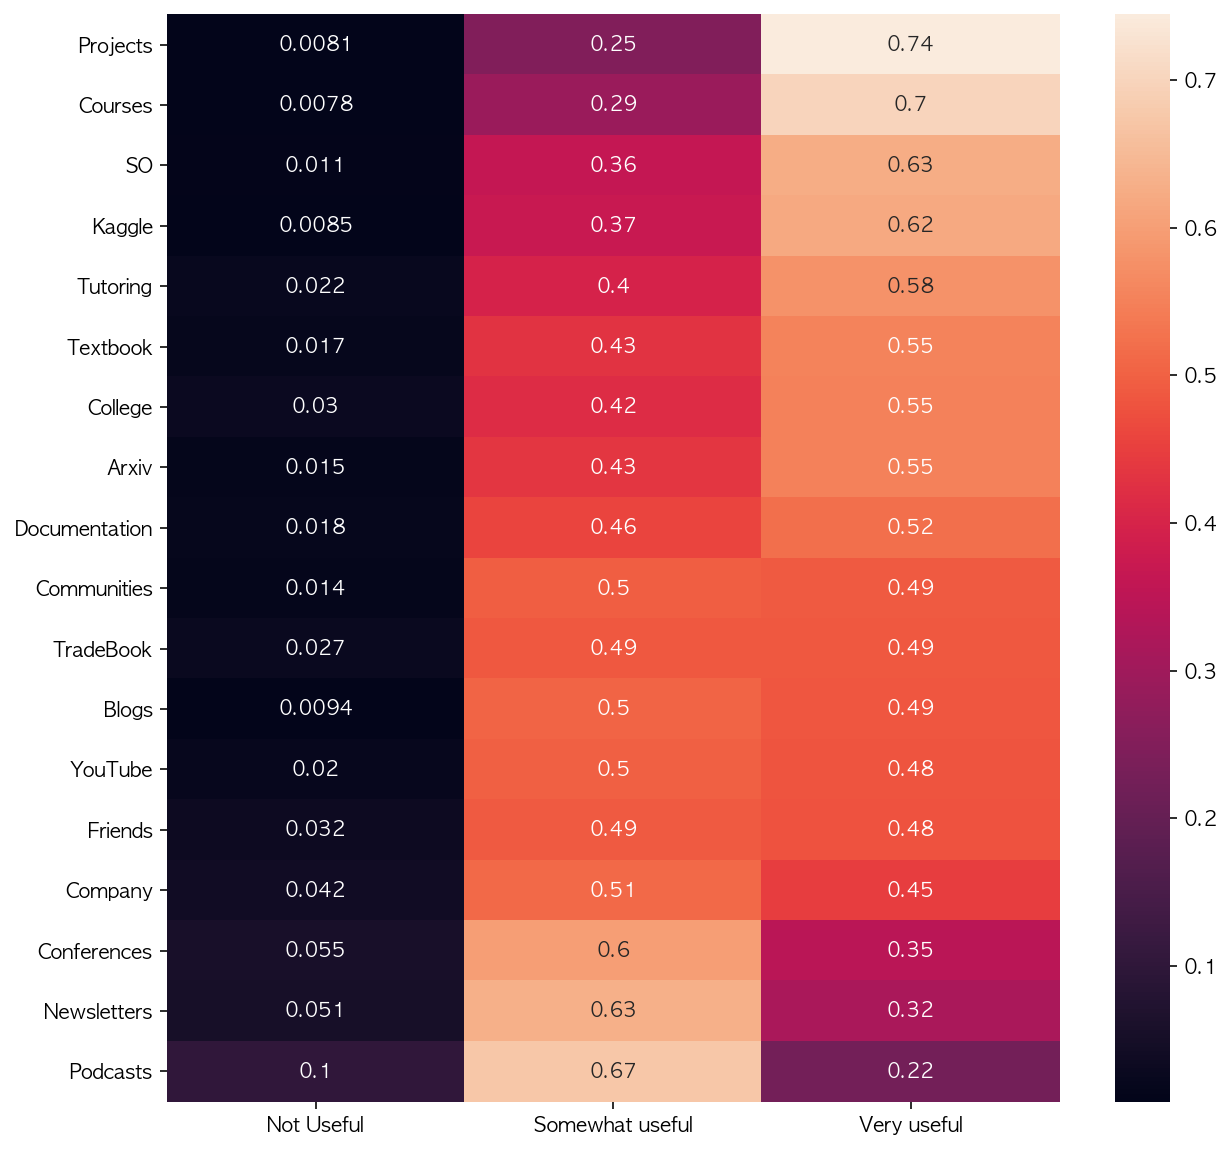

In [43]:
# 학습플랫폼과 유용함에 대한 연관성을 살펴본다.
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending=False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다.
plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values(
        "Very useful", ascending=False), annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

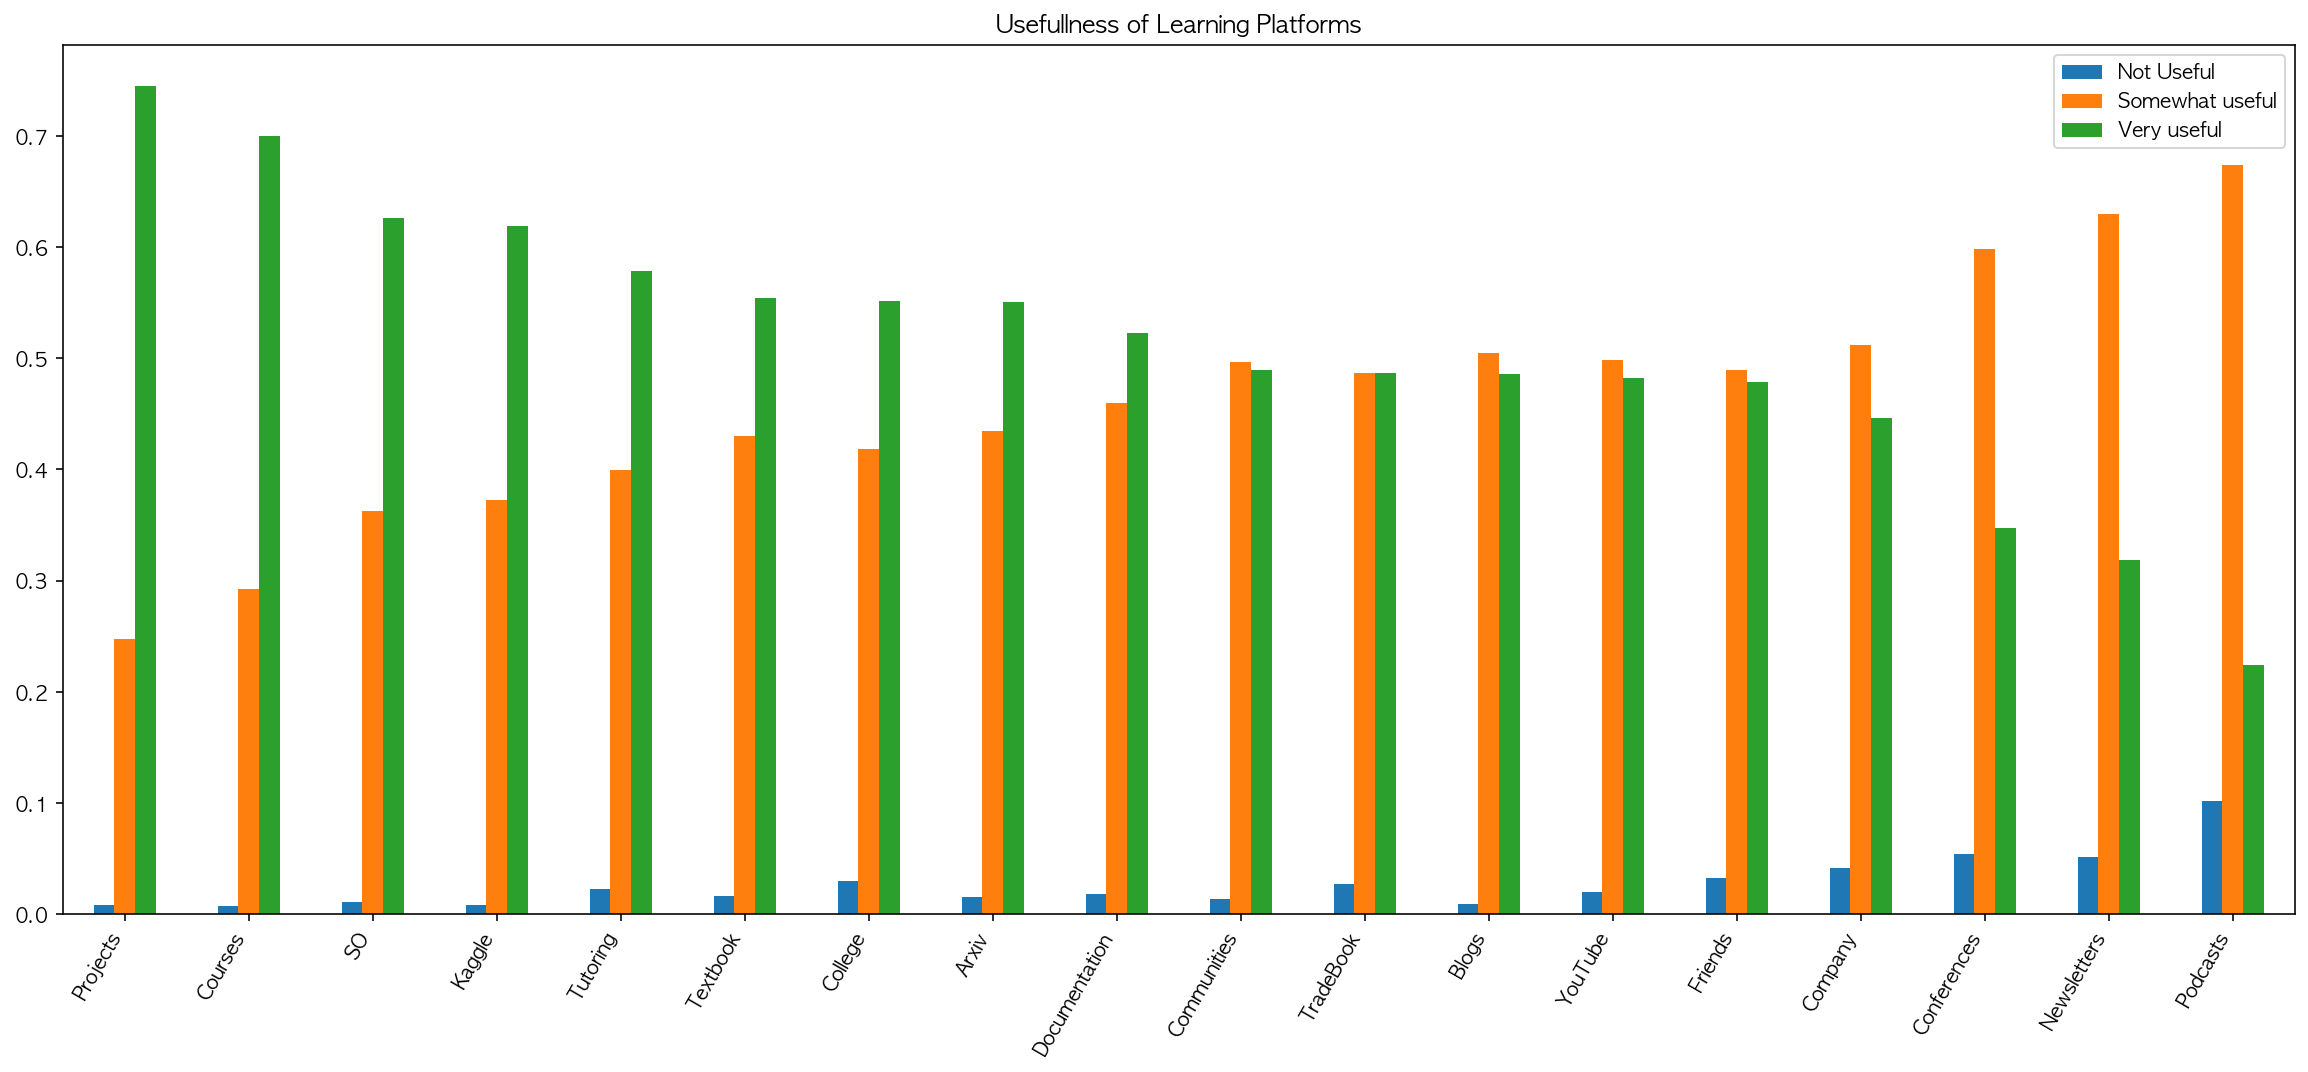

In [44]:
# 유용함의 정도를 각 플랫폼별로 그룹화 해서 본다.
fdf.plot(kind='bar', figsize=(20,8),
         title="Usefullness of Learning Platforms")
plt.xticks(rotation=60, ha='right')

In [45]:
cat_features = [x for x in mcq.columns if x.find(
    'LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [46]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# 파이차트를 그리기 위해 평균 값을 구해와서 담아준다.
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

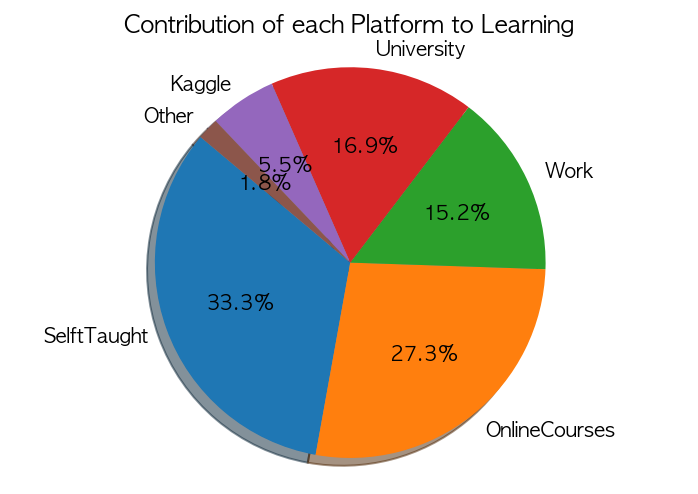

In [47]:
# 학습 플랫폼 별 도움이 되는 정도를 그려본다.
plt.pie(cdf, labels=cdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

In [48]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [49]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

(4206,)

In [50]:
mcq['HardwarePersonalProjectsSelect'
   ] = mcq['HardwarePersonalProjectsSelect'
          ].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: 
              pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [51]:
s = s[s != 'nan']

In [52]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
GCE ...),669
Laptop + Cloud service (AWS,669
Azure,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147
